<h1>Morphological image processing</h1>

Morphological image processing (or morphology) describes a range of image processing techniques that deal with the shape (or morphology) of features in an image. Morphological operations are typically applied to remove imperfections introduced during segmentation, and they are typically operate on binary (where the pixels of the image can only be 0 or 1) images.

<h2>Structuring Element</h2>

Structuring Element is the base structure we will use to apply a morphological operation. The shape of a Structuring Element can change depends of what type of a shape are we looking for in an image. Here are some examples of SE and their rectangular array forms. (Surely we need to convert a SE in a 2D matrix form to be able to represent it in programming)

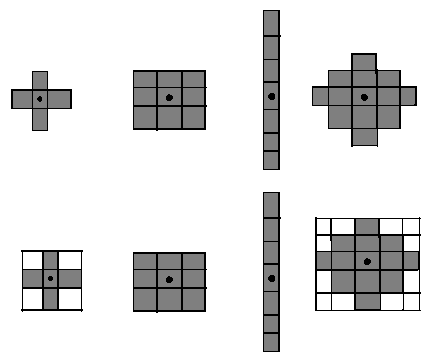

<h2>Erosion</h2>

In Erosion, the Structure Element travels trough the image and where the image pattern and Structure Element pattern match exactly, the pixel at the seed point of Structure Element in image is changed to 1, and to 0 if they don’t. Note that Erosion operation usually represented by ⊖

X⊝B={z|(B^)Z∈X}

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.draw import circle
from skimage.morphology import erosion, dilation
import cv2

In [10]:
image = np.zeros((100, 100))
image[circle(50, 50, 25)] = 1

C:\Users\DELL\AppData\Local\Temp/ipykernel_3696/1141956002.py:2: FutureWarning: `draw.circle` is deprecated in favor of `draw.disk`.`draw.circle` will be removed in version 0.19
  image[circle(50, 50, 25)] = 1


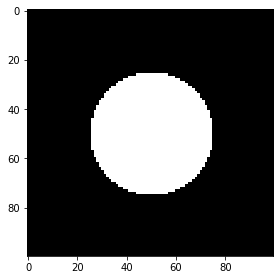

In [13]:
imshow(image);

C:\Users\DELL\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


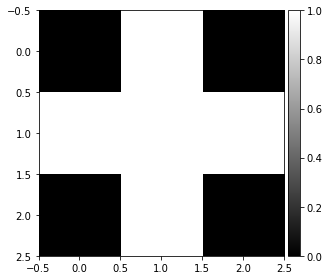

In [6]:
cross = np.array([[0,1,0],
                  [1,1,1],
                  [0,1,0]])
imshow(cross, cmap = 'gray');

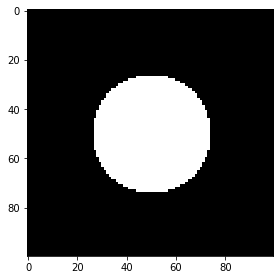

In [14]:
eroded_circle = erosion(image, cross)
imshow(eroded_circle);

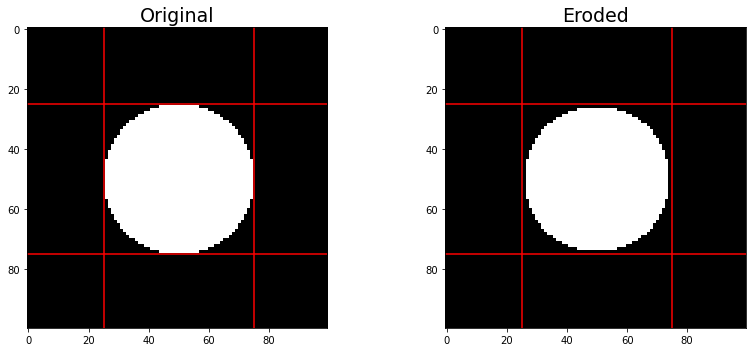

In [16]:
linecolor = 'red'
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(image, cmap = 'gray');
ax[0].set_title('Original', fontsize = 19)
ax[0].axvline(x = 25, color = linecolor)
ax[0].axvline(x = 75, color = linecolor)
ax[0].axhline(y = 25, color = linecolor)
ax[0].axhline(y = 75, color = linecolor)
ax[1].imshow(eroded_circle, cmap = 'gray');
ax[1].set_title('Eroded', fontsize = 19)
ax[1].axvline(x = 25, color = linecolor)
ax[1].axvline(x = 75, color = linecolor)
ax[1].axhline(y = 25, color = linecolor)
ax[1].axhline(y = 75, color = linecolor)
fig.tight_layout()

We see that the eroded circle has **slightly shrunk**. This is what it means to erode an image. If we were to iterate over the erosion function, its effect becomes quite clear.

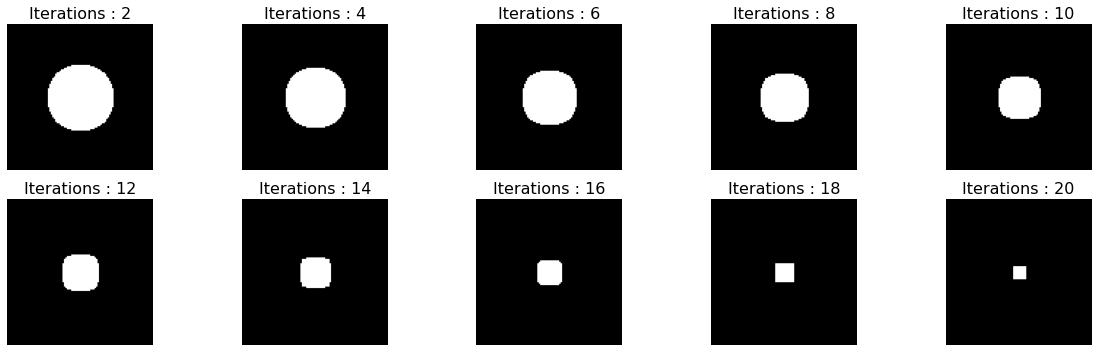

In [18]:
def multi_erosion(image, kernel, iterations):
    for i in range(iterations):
        image = erosion(image, kernel)
    return image
ites = [2,4,6,8,10,12,14,16,18,20]
fig, ax = plt.subplots(2, 5, figsize=(17, 5))
for n, ax in enumerate(ax.flatten()):
    ax.set_title(f'Iterations : {ites[n]}', fontsize = 16)
    new_circle = multi_erosion(image, cross, ites[n])
    ax.imshow(new_circle, cmap = 'gray');
    ax.axis('off')
fig.tight_layout()

<h2>Dilation</h2>

Dilation is a process in which the binary image is expanded from its original shape. The way the binary image is expanded is determined by the structuring element.
If there exists an overlapping then the pixels under the center position of the structuring element will be turned to 1 or black.

X⊕B={z|[(B^)Z∩X]∈X}

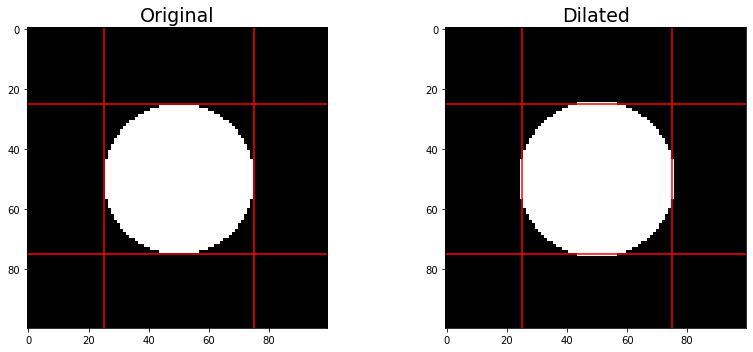

In [26]:
dilated_circle = multi_dilation(image, cross, 1)
linecolor = 'red'
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(image, cmap = 'gray');
ax[0].set_title('Original', fontsize = 19)
ax[0].axvline(x = 25, color = linecolor)
ax[0].axvline(x = 75, color = linecolor)
ax[0].axhline(y = 25, color = linecolor)
ax[0].axhline(y = 75, color = linecolor)
ax[1].imshow(dilated_circle, cmap = 'gray');
ax[1].set_title('Dilated', fontsize = 19)
ax[1].axvline(x = 25, color = linecolor)
ax[1].axvline(x = 75, color = linecolor)
ax[1].axhline(y = 25, color = linecolor)
ax[1].axhline(y = 75, color = linecolor)
fig.tight_layout()

In [28]:
def multi_dilation(image, kernel, iterations):
    for i in range(iterations):
        image = dilation(image, kernel)
    return image

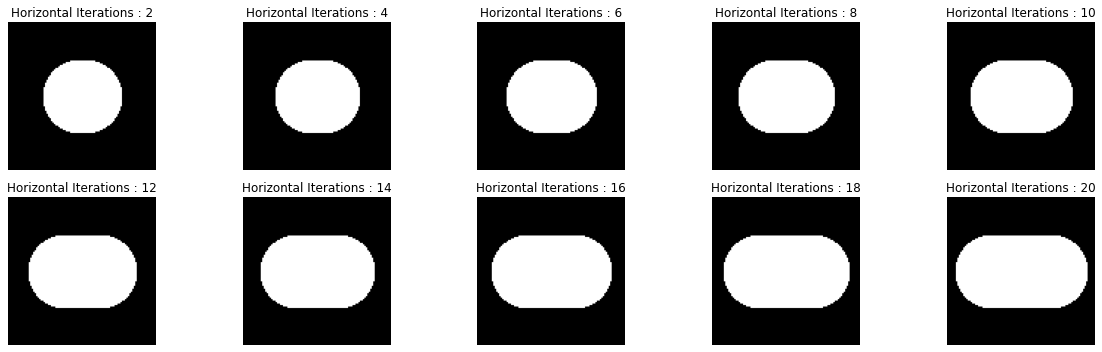

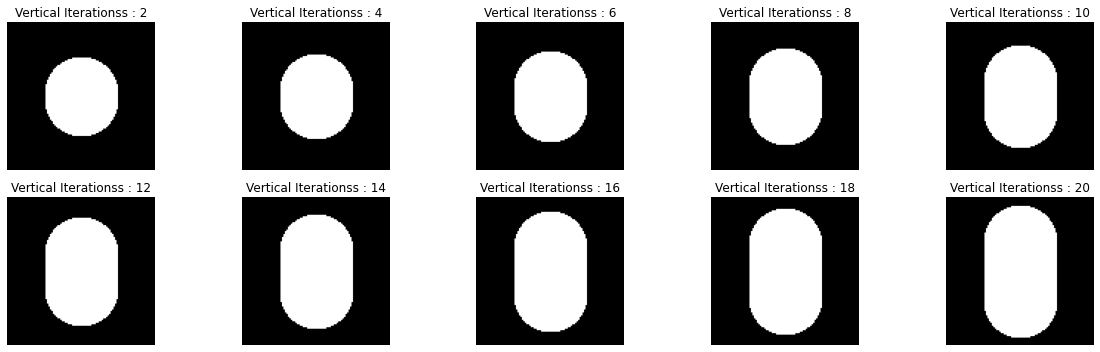

In [29]:
ites = [2,4,6,8,10,12,14,16,18,20]
fig, ax = plt.subplots(2, 5, figsize=(17, 5))
for n, ax in enumerate(ax.flatten()):
    ax.set_title(f'Horizontal Iterations : {ites[n]}', fontsize = 
                 12)
    new_circle = multi_dilation(image, h_line, ites[n])
    ax.imshow(new_circle, cmap = 'gray');
    ax.axis('off')
fig.tight_layout()
fig, ax = plt.subplots(2, 5, figsize=(17, 5))
for n, ax in enumerate(ax.flatten()):
    ax.set_title(f'Vertical Iterationss : {ites[n]}', fontsize = 12)
    new_circle = multi_dilation(image, v_line, ites[n])
    ax.imshow(new_circle, cmap = 'gray');
    ax.axis('off')
fig.tight_layout()

### Thank you 
## Author

<a href="https://www.linkedin.com/in/muhammad-zaman-ali-a22946208/" target="_blank">Muhammad Zaman Ali</a>

<hr>

## <h3 align="center"> © <a href="https://www.linkedin.com/company/mt-learners/" target="_blank">Mt Learners</a> 2022. All rights reserved. <h3/>
